<img src="https://drive.google.com/uc?id=1-hPP-XPm9_5M3orUgmompcVleQ5xvPST" style="Width:1000px">

# Introduction to Geostatistics and Kriging
<br>

<center><img src="https://drive.google.com/uc?id=17LZZhafq83RfB6OLpqYTRBvoTowojBZF" style="width:900px;"><br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
<br>Prompt: a 4k photo of a blue-gray shrew coming out of a ground hole holding a golden nugget in her hand and wearing a miners hat, digital art.</center>

To follow this more advanced class, you will need to have the `pykrige` package installed. So let's run the cell below and install it:

In [ ]:
!pip install pykrige


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


# Principle

In the previous machine learning exercises we generally modelled (predicted) one variable by using other exogenous variable. With <code>geostatistics</code> we will see that we can infer the distribution of a variable through space **using a few key assumptions**. This spatial autocorrelation will help us, for instance, interpolating data in space.

👆 First, let's review some key concepts

### Measuring distance

We can imagine the theoretical distribution of a continuous variable as an unknown function $Z(s)$, where $s$ is the location of the point. Any given point can be separated by a distance $h$
<img src="https://drive.google.com/uc?id=17QOzuY88Gv44HK2quxpn99HLVq6E1AE7" style="width:900px">
<a href="https://aegis4048.github.io/spatial-simulation-1-basics-of-variograms">Kim, 2019</a>

### Measuring distance

This distance can be measured at any span (lag) and in any direction, not just diagonally.
<img src="https://drive.google.com/uc?id=17PSFRF6G1mKl6zQQQH0b5-AfJ03x06ap" style="width:900px">
<a href="https://aegis4048.github.io/spatial-simulation-1-basics-of-variograms">Kim, 2019</a>

### Semivariogram <span style="color:teal">$\gamma(h)$</span>  (and variogram <span style="color:teal">$2\gamma$</span> )

The semivariogram (<span style="color:teal">$\gamma(h)$</span>) is half the spatial variance between two data points separated by the lag distance h:

$$\gamma(h)=\frac{1}{2n(h)}\sum_{\alpha=1}^{n(h)}(z(u\alpha)−z(u\alpha+h))^2$$

<span style="color:red">$n(h)$</span> = number of all data point pairs separated by the distance, h.

<span style="color:blue">$h$</span> = **lag distance**. Separation between two data points.

<span style="color:green">$u\alpha$</span> = data point on 2D or 3D space at the location, $\alpha$.

<span style="color:green">$u\alpha+$</span><span style="color:blue">$h$</span> = data point separated from <span style="color:green">$u\alpha$</span> by the distance, <span style="color:blue">$h$</span>.

$z($<span style="color:green">$u\alpha$</span>) = numerical value of data point

$z($<span style="color:green">$u\alpha+$</span><span style="color:blue">$h$</span>) = numerical value of data point

<img src="https://drive.google.com/uc?id=17RIuM6EgQx9vU7cFwMFxo17NlJq1oagB" style="width:1300px">
<a href="https://aegis4048.github.io/spatial-simulation-1-basics-of-variograms">Kim, 2019</a>

<span style="color:purple">nugget</span>:  Variance at <span style="color:blue">$h=0$</span>

<span style="color:green">range (a)</span>: lag distance $a$ at which spatial data pairs lose correlation (i.e. reaches the **sill**).

<span style="color:teal">Sill ($\sigma^2$)</span>: Value for the variance at the **range** distance

<span style="color:red">Variogram Model</span>: The blue datapoints are fitted with a model (the red line) which is limited to a few defined functions.

<img src="https://drive.google.com/uc?id=17RIuM6EgQx9vU7cFwMFxo17NlJq1oagB" style="width:1300px">
<a href="https://aegis4048.github.io/spatial-simulation-1-basics-of-variograms">Kim, 2019</a>

#### Nugget Effect (c0)

Refers to the nonzero intercept of the variogram and is an overall estimate of error caused by measurement inaccuracy and environmental variability occurring at fine enough scales to be unresolved by the sampling interval.

## Building the semivariogram

We can build a semivariogram by simply plotting the variance of samples separated by a range of different distances:
<img src="https://drive.google.com/uc?id=17NykX5oZZV_sDsI37BlaW8Q7LG6U5Suv" style="width:1500">

<img src="https://drive.google.com/uc?id=17NXuEGtCBjNfoHHso4oHUTgUpKc-6wA6" style="width:1500">

<img src="https://drive.google.com/uc?id=17Mhh1Tj1ZBz30C2AkXc7kgPfNiARHs__" style="width:1500">
<a href="https://aegis4048.github.io/spatial-simulation-1-basics-of-variograms">Kim, 2019</a>

### The variogram model

We then 'fit' a regression line through the points we have identified. This is the `variogram model` and is represented by the red line in the figures above. The choice of an appropriate <span style="color:red">variogram model</span> is a crucial one. The most common functions are:

#### Gaussian function
$\gamma(h)=(s-n)\left(1-\exp\left(-\frac{h^2}{r^2a}\right)\right) + n1_{(0,\infty)}(h)$

#### Spherical function
$\gamma(h)=(s-n)((\frac{3h}{2r}-\frac{h^3}{2r^3})l_{[0,r)}(h)+l_{(0,\inf)}(h))+nl_{(0,\inf)}(h)$

#### Exponential function
$\gamma(h)=(s-n)(1-e^{(-h/(ra))})+nl_{(0,\inf)}(h)$

**Other functions include** linear, power, and hole-effect (but are less commonly applied)


## Interpolating Spatial Data (Kriging)

We can now make use of the semivariogram in order to be able to model (interpolate) spatial data with few observations (left below) to a continuous field (right below):
<img src="https://drive.google.com/uc?id=17RtbcELfEHQtan5khFi6nIZSB9BMS_yU" style="width:1500">

### The <span style="color:teal">Kriging Method</span> and the birth of <span style="color:blue">Geostatistics</span>

<img src="https://drive.google.com/uc?id=17My9iWZPhkXxxYkp6vA-lvBvM8_DTcNb" style="height:310px;padding:3px" align="left">
<img src="https://drive.google.com/uc?id=17OYFEVZ3koBwJOdUNfqtRJVh1alriF_A" style="height:330px;padding:5px" align="left">


This problem was solved first in 1951 by a South African mining Engineer (<span style="color:teal">***Danige Kriege, left***</span>) working on gold mines. It was later perfect by a French statistician (<span style="color:blue">***Georges Matheron, right***</span>) who gave birth to the field of <span style="color:blue">**Geostatistics** </span>(this term refers specifically to this technique, and not to any statistics applied in geosciences). The <span style="color:teal">**Kriging**</span> method proved so useful that  fields other than geosciences (e.g. ecology, meteorology, ...) adopted it over time.

## Simple Kriging
This is the original method invited by Krige. It relies on the assumption of stationarity for the dataset.

$$E[Z(s)]=\sum_{i=1}^n(s_i*p_i)=\mu$$

☝🏾 Assumes **stationarity** of $Z$

$$Var[Z(s)-Z(s+h)] = 2\gamma(|h|)$$

Goal of Kriging is to predict the random field $Z(s_{0})$ at location $s_{0}$ from the observed data. To do this, Kriging consists of solving the following equation:

$$\hat{Z}(s_{0})=\sum_{i=1}^{n}\beta_{i}Z(s_{i})$$

☝🏾 where the weights $\beta_{i}$ are chosen to make the estimator unbiased and of minimal prediction error.

Unbiasedness means that:
$$E[\hat{Z}(s_{0})]=E[\sum_{i=1}^{n}\beta_{i}Z(s_{i})]$$

$$=\sum_{i=1}^{n}\beta_{i}E[Z(s_{i})]$$

$$=\sum_{i=1}^{n}\beta_{i}\mu$$

Last equality derives from the stationarity of the mean. The estimator is unbiased, i.e.:

$$E[\hat{Z}(s_{0})] = E[Z(s_{0})]$$

If the weights sum to parity:

$$\sum_{i=1}^{n}\beta_i=1$$

#### Kriging Variance ($\sigma^2_{s_0}$)

$$\sigma_{s_0}\equiv E[\hat{Z}(s_0)-Z(s_0)]^2$$

$$=E[\sum_{i=1}^n\beta_i (Z(s_i)-Z(s_0))]^2$$

Which can be expanded:
$$=E[\sum_{i=1}^n\sum_{j=1}^n\beta_i \beta_j \frac{(Z(s_i)-Z(s_j))^2}{2}-\sum_{i=1}^n \beta_i(Z(s_i)-Z(s_0))^2]$$

$$=\sum_{i=1}^n\sum_{j=1}^n\beta_i \beta_j \frac{E[Z(s_i)-Z(s_j)]^2}{2}-\sum_{i=1}^n \beta_i E[Z(s_i)-Z(s_0)]^2$$

$$=\sum_{i=1}^n\sum_{j=1}^n\beta_i \beta_j \gamma(|h_{ij}|)-\sum_{i=1}^n \beta_i 2\gamma(|h_{i0}|)$$

### Solving the Kriging Equation

Solving the Kriging equation means finding the best weights $\beta$ to minimize the Kriging Variance. Exactly ***how*** this is done is beyond the scope of this module (but those of you taking the ***optimization*** module might learn more about it).

Just for completeness sake, know that the method used is the **Lagrange Multiplier Method** (a constrained optimization method).

With that method, the optimal weights are found by setting to zero, the partial derivative, with respect to each $\beta_i$ of the objective function defined as:

$$f(\beta_1,...,\beta_n,\lambda)={\sigma_{s_0}}^2+2\lambda(\sum_{i=1}^n \beta_i-1))$$

Where $\lambda$ is known as the ***Lagrange Multiplier***

The partial derivative $\frac{\partial f}{\partial \lambda}$ set to zero yields the unbiasedness condition, and a system of n+1 linear equations to be solved for the n optimal weights $\beta_1, . . . , \beta_n$. The set of these linear equations is called the **ordinary kriging system (Matheron 1971)**:

$$\Bigg\{^{\sum_{j=1}^n \beta_j\gamma(|h_{ij}|) + \lambda = \gamma(|h_{i0}|) \;\;\;\;\;\; i=1,...,n}_{\sum_{j=1}^n \beta_j=1}$$

# Simple Kriging in Practice

Let's solve a spacial problem: predicting the distribution of porosity in the subsurface. We will use Ordinary Kriging. We will also need the same data as used in the lecture, so first let's load it:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://drive.google.com/uc?id=12vUhzKPK2FPaSareyLQgtGeFJncxSfOB")  
data

,X,Y,Facies,Porosity,Perm,AI
0,100.0,900.0,1.0,0.100187,1.363890,5110.699751
1,100.0,800.0,0.0,0.107947,12.576845,4671.458560
2,100.0,700.0,0.0,0.085357,5.984520,6127.548006
3,100.0,600.0,0.0,0.108460,2.446678,5201.637996
4,100.0,500.0,0.0,0.102468,1.952264,3835.270322
...,...,...,...,...,...,...
256,780.0,669.0,1.0,0.175642,629.138468,3140.692477
257,50.0,779.0,1.0,0.091725,0.656564,6197.834381
258,430.0,589.0,1.0,0.139057,13.124324,3981.017070
259,130.0,489.0,0.0,0.099351,8.681915,4954.088777


#### Limiting ourselves to sand data

To simplify this example, we will only look at the sandy lithologies:

In [ ]:
sand = data[data.Facies==1]
shale = data[data.Facies==0]

In [ ]:
x = sand.X.values
y = sand.Y.values
phi = sand.Porosity.values

# Geospatial Colinearity

#### Let's plot the spatial variability of porosity

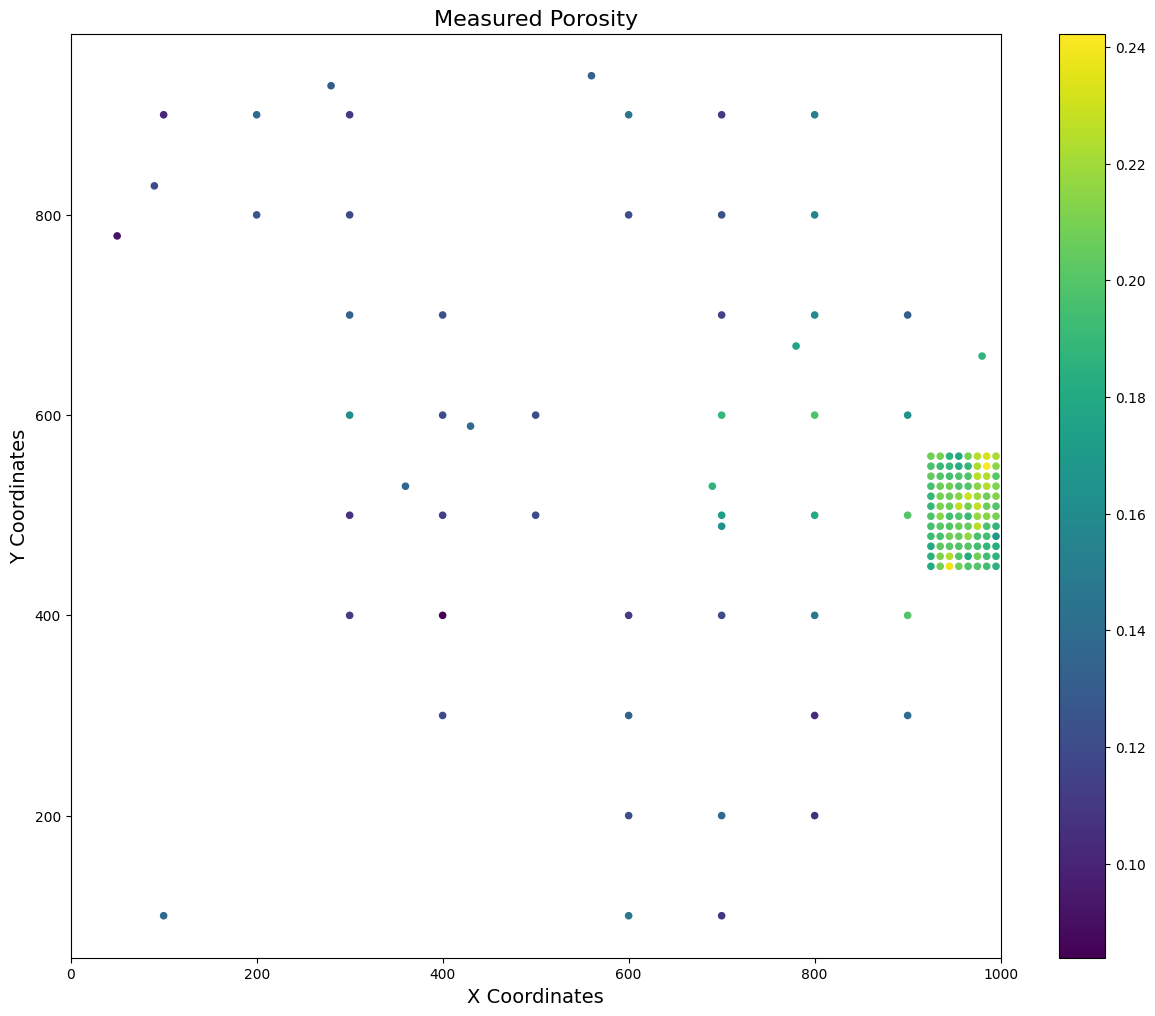

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,12))
sc = ax.scatter(x, y, c=phi,s=20);ax.set_title('Measured Porosity', size=16)
ax.set_xlabel('X Coordinates', size=14);ax.set_ylabel('Y Coordinates', size=14)
plt.colorbar(sc);ax.set_xlim(0,1000);

Now we can try to model a continuous field from this data, using simple Kriging from the  <code>pykrige</code> library (<a href="https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/">documentation</a>).

In [ ]:
from pykrige.ok import OrdinaryKriging

OK = OrdinaryKriging(
    x, 
    y, 
    phi, 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=30,
)

In [ ]:
OK.variogram_model_parameters

In [ ]:
gridx = np.arange(0, 1000, 10, dtype='float64')
gridy = np.arange(0, 1000, 10, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy)

In [ ]:
print(zstar.shape)
print(ss.shape)

In [ ]:
fig, ax_ok = plt.subplots(1,1, figsize=(15,13))
cax = ax_ok.imshow(zstar, extent=(0, 1000, 0, 1000), origin='lower')
ax_ok.scatter(x, y, c='k', marker='.'); cbar=plt.colorbar(cax)
ax_ok.set_title('Spatial Prediction of Porosity', size=18); ax_ok.set_xlim(0,1000);

## Kriging Variance

In [ ]:
fig, ax_okv = plt.subplots(1,1, figsize=(15,13))
cax = ax_okv.imshow(ss, extent=(0, 1000, 0, 1000), origin='lower')
ax_okv.scatter(x, y, c='k', marker='.'); cbar=plt.colorbar(cax)
ax_okv.set_title('Kriging Variance (estimated uncertainty) for Porosity', size=18); ax_okv.set_xlim(0,1000);

# Universal Kriging

The problem with **Ordinary Kriging** is that it assumes stationarity. Of course, most geospatial applications are **NOT** stationary. Universal Kriging is meant to solve this problem. The main difference is that it models the predictor variable ($Z(s)$) as a linear combination of a deterministic term ( the drift "$\mu(s)$", non-stationary) and a probabilistic term ("$Y(s)$", stationary):

$$Z(s)=\mu(s)+Y(s)$$

Suppose the drift μ(s) can be represented as a linear combination of known functions $\{fl(s),\;\;\;\; l = 1, . . . , k\}$, with unknown coefficients $\{\beta l\}$,
$$\mu(s)=\sum_{l=1}^k \beta_l f_l(s)$$

This means that the mean and covariance can be expressed as:
$$E[Z(s)]=\sum_{l=1}^k \beta_l f_l(s)$$

$$E[(Z(s_1)-\mu(s_1))(Z(s_2)-\mu(s_2))]\equiv E[Y(s_1)Y(s_2)]$$
$$= Cov(s1-s2)$$

The Universal Kriging predictor has the same form as for Ordinary Kriging:
$$\hat{Z}(s_{0})=\sum_{i=1}^{n}\beta_{i}Z(s_{i})$$

But the unbiasedness condition becomes more complicated (Matheron, 1969):
$$f_l(s_0)=\sum_{i=1}^n \beta_1 f_l(s_i) \;\;\;\;\;\; l=1,...,k$$

The Universal Kriging Variance becomes:
$$=\sum_{i=1}^n\sum_{j=1}^n\beta_i \beta_j Cov(s_i-s_j)-2\sum_{i=1}^n \beta_i Cov(s_i-s_0) + var(Z(s_0))$$

The $n+k$ Universal Kriging linear equations are:
$$\Bigg\{^{\sum_{j=1}^n \beta_j Cov(s_i-S_j)+\lambda_l f_l(s_i) = Cov(s_i-s_0) \;\;\;\;\;\; i=1,...,n}_{\sum_{j=1}^n \beta_j f_l(s_j)=f_l(s_0)\;\;\;\;\;\; i=1,...,k}$$

☝🏻 I skipped several mathematical steps here. If you are interested in the details, read <a href="https://link.springer.com/book/10.1007/0-387-35429-8">Le and Zidek, 2006, Statistical Analysis of Environmental Space-Time Processes (Chapter 7)</a>

In [ ]:
from pykrige.uk import UniversalKriging

UK = UniversalKriging(
    x, 
    y, 
    phi, 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=30,
)

In [ ]:
gridx = np.arange(0, 1000, 10, dtype='float64')
gridy = np.arange(0, 1000, 10, dtype='float64')
zstar_uk, ss_uk = UK.execute("grid", gridx, gridy)

In [ ]:
fig, ax_uk = plt.subplots(1,1, figsize=(15,13))
cax = ax_uk.imshow(zstar_uk, extent=(0, 1000, 0, 1000), origin='lower')
ax_uk.scatter(x, y, c='k', marker='.'); cbar=plt.colorbar(cax)
ax_uk.set_title('Universal Kriging Porosity estimate', size=18); ax_uk.set_xlim(0,1000);

In [ ]:
fig, ax_ukv = plt.subplots(1,1, figsize=(15,13))
cax = ax_ukv.imshow(ss_uk, extent=(0, 1000, 0, 1000), origin='lower')
ax_ukv.scatter(x, y, c='k', marker='.'); cbar=plt.colorbar(cax)
ax_ukv.set_title('Universal Kriging Variance for Porosity', size=18); ax_ukv.set_xlim(0,1000);

## Limitations of Kriging

🔺 **Weights of the kriging interpolator depend on the modeled variogram** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;👉  kriging  quite sensitive to misspecification of the variogram model.

🔺 **Assumptions of the kriging model** (e.g. that of second-order stationarity) may be difficult to meet in the context of many environmental exposures<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;👉  some newer methods (e.g. Bayesian approaches) have  been developed to try and surmount these obstacles

🔺 **Accuracy of interpolation by kriging** will be limited if the number of sampled observations is small, the data is limited in spatial scope, or if the data are not sufficiently spatially correlated. 

# Your Turn: Kriging Global Cities Temperatures

<img src="https://drive.google.com/uc?id=1ushHnFHAvvOswSC7EbYh6UDmrvgs1rfI" style="Width:1000px">

In this exercise, you will again use a modified version of the world's city temperature. But this time, we will try to answer this important question: what were the patterns of warming and cooling between December 2004 and December 2010 in **Eurasia**?

To answer this question, we will use **Universal Kriging** 

# Reading the data

Simply load the `global-temperatures.csv` and save it under a variable named `data`. You should recognize this data (this time, it is not split).

In [ ]:
from nbta.utils import download_data
download_data(id='1RfdAqcYrosxZl6chsufLzxPcvQqO3qjX')

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
                    
                    
                    

# Limiting ourselves to Eurasia

Create a new dataframe called `eurasia` that contains only the cities between -20 and +150 degrees of Longitude, and -40 and +60 degrees of Latitude.

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
                    
                    
                    

# Creating the December 2004 and December 2010 datasets

Using the `eurasia` DataFrame you created above, create two further splits:

* All cities in Eurasia in December 2004. However, because this would still be a very large number of cities to fit a `kriging` model to, we will limit ourselves to 60% of this. So, randomly sample 60% of this new dataframe, and assign it to a variable called `december_2004`.

* Do the same process (also randomly sampling 60% of the filtered data) for cities in Eurasia in December 2010 (call it `december_2010`

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
                    
                    
                    

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('dataset',
                         december_2004 = december_2004,
                         december_2010 = december_2010
)

result.write()
print(result.check())

# 💪 Fitting you first Kriging model

Now, fit a `UniversalKriging` model from `pykrige` to the `december_2004` data: check the course notes to see how to do this, or read <a href="https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/">the documentation</a>.

This will take a few minutes. Make sure that your choice of variogram model fits the data reasonably well.

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
                    
                    
                    

## Once your model is fitted...

Create a list of values between -20 and 150 with 1 degree spacing for Longitude, and between -40 and 60 with 1 degree spacing for Latitude (see `np.arrange`). Then, use the `execute()` function of your December 2004 Universal Kriging model to obtain both the gridded predictions for temperatures, and the gridded Kriging variance (i.e. the error).

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
                    
                    
                    

# Plotting the predicted spatial temperatures and Kriging variance

Plot first the predicted spatial temperatures, and the kriging variance, on two separate plots. For both plots, I suggest you do:
* Use a large `figsize` (mine is `(15, 30)` but feel free to experiment)
* Make sure to limit your axis to -20 to 150 for Longitude, and -40 to 60 for Latitude
* Plot on the same axis both the gridded predicted spatial temperatures, and the actual cities
* For both, it looks nice if you use the `coolwarm` colormap: it is blue for cold values, and red for hotter values
* Drawing the cities will ensure you see the contour of the continents
* Add a colorbar for maximum effect, and ensure that when you scatter the city data use use `c=december_2004.AverageTemperature`: this way, you can see whether the Kriging estimate is reasonable.
* For the Kriging variance plot, plot the cities in black

What conclusions can you reach? What do you think of the predicted temperatures in the Indian Ocean?

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
                    
                    
                    

# Producing the production and the maps for December 2010

Repeat exactly the same steps as above, for the for 2010 dataset of Eurasian cities. Makes sure to call your predictions differently, as we will use both sets in the next section. Does December 2012 look very similar to December 2004? How about the Kriging Variance?


In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
                    
                    
                    

# Plotting the difference between the two model

The great thing with this approach, is that we can now plot the difference in predicated temperatures between the two maps. The temperature predictions are simply numpy array, so you can subtract the December 2004 predicted temperatures from the December 2010 temperatures, and look at regional patterns of change. Save this new difference array in a variable named `diff`.

Keep in mind that because we have randomly selected 60% of cities in both year, we could not have achieved this by simply subtracting the 2004 values in all cities from the 2010 values in all cities: `geostatistical` mapping was necessary!

What can you see about the difference in temperature between these two winters when you do this, and plot the results?

In [ ]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells
                    
                    
                    

<h2>💡 Conclusions</h2>
<br>
If you have done the exercise right, you should have noticed that:<br>
    <li>The prediction error is larger further away from points of observations</li>
    <li>Errors are particularly large on Oceans, because we have no observation in our dataset other than cities</li>
    <li>Coastlines are very well constrained thanks to a large density of population on the coast</li>
    <li>It appears that globally December 2010 was warmer than 2004 in most of Asia and Africa, but a little cooler in Europe.</li>
<br>
If you feel like it, feel free to run a model with full dataset (but be prepared to be patient!).

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('visualization',
                         df = diff
)

result.write()
print(result.check())

# 🏁 Finished!

Well done! <span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.